## Лаб.03 EM-алгоритм

### Кластеризация ЕМ-методом

---

#### Входные данные: 
нет

#### Задание:
Создать облака точек. Написать программный код для разделения смесей нормального распределения. Вывести центры полученных кластеров вместе с исходными точками.

**Порядок выполнения работы:**
1.	Сгенерируйте датасет в виде облака из 1000 точек. Воспользуйтесь кодом для генерации координат в виде нормального распределения:

`X1 = 2.0*np.random.randn(n_samples, 2) + np.array([5, 3])`<br>
`C = np.array([[0., -0.5], [3.5, .7]])`<br>
`X2 = np.dot(np.random.randn(n_samples, 2), C)`<br>
`X = np.vstack([X1, X2])`

2.	Выведите на диаграмме облако точек для контроля.
3.	Обучите алгоритм кластеризации, используя метод (`sklearn.mixture.GaussianMixture`).
4.	Выведите средние значения компонентов смеси (параметр `means_`), веса (`weights_`), предсказанные метки, предсказанные вероятности и правдоподобие (`score`).
5.	Выведите на диаграмме облако точек, раскрашенных в соответствии с присвоенными метками, а также точки с координатами средних значений (условные центры).

---

1.	Сгенерируйте датасет в виде облака из 1000 точек. **Generate a dataset in the form of a cloud of 1000 points.**<br>Воспользуйтесь кодом для генерации координат в виде нормального распределения:<br><br>`X1 = 2.0*np.random.randn(n_samples, 2) + np.array([5, 3])`<br>`C = np.array([[0., -0.5], [3.5, .7]])`<br>`X2 = np.dot(np.random.randn(n_samples, 2), C)`<br>`X = np.vstack([X1, X2])`

In [ ]:
# подключаем необходимые пакеты

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# создаем переменные для кластеризации

n_cluster = 2
n_samples = 1000

# код из условия для создания нормального распределения

X1 = 2.0 * np.random.randn(n_samples, 2) + np.array([5, 3])
C = np.array([[0., -0.5], [3.5, .7]])

X2 = np.dot(np.random.randn(n_samples, 2), C)
X = np.vstack([X1, X2])

--- 

2.	Выведите на диаграмме облако точек для контроля.
* Draw a point cloud on the diagram for control.

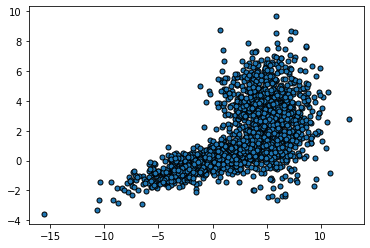

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=25, edgecolor='k')
plt.show()

---

3.	Обучите алгоритм кластеризации, используя метод (`sklearn.mixture.GaussianMixture`).
* Train the clustering algorithm using the (`sklearn.mixture.GaussianMixture`) method.

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=n_cluster, covariance_type='full', random_state=0)
gmm.fit(X)

GaussianMixture(n_components=2, random_state=0)

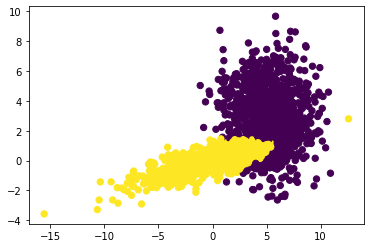

In [ ]:
y = gmm.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='viridis')
plt.show()

--- 

4.	Выведите средние значения компонентов смеси (параметр `means_`), веса (`weights_`), предсказанные метки, предсказанные вероятности и правдоподобие (`score`).
* Print the averages of the mixture components (parameter `means_`), the weights (`weights_`), the predicted labels, the predicted probabilities, and the likelihood (`score`).

In [ ]:
print(gmm.means_)
print()
print(gmm.weights_)
print()
print(gmm.predict(X))
print()
print(gmm.predict_proba(X))
print()
print(gmm.score(X))

[[5.08117479 3.00316639]
 [0.06494616 0.03104998]]

[0.50640208 0.49359792]

[0 0 0 ... 1 1 1]

[[7.21010830e-01 2.78989170e-01]
 [9.91383055e-01 8.61694484e-03]
 [6.55914659e-01 3.44085341e-01]
 ...
 [1.02268086e-03 9.98977319e-01]
 [3.20100735e-05 9.99967990e-01]
 [1.21986362e-01 8.78013638e-01]]

-4.329818502561544


---

5.	Выведите на диаграмме облако точек, раскрашенных в соответствии с присвоенными метками, а также точки с координатами средних значений (условные центры).
* Display on the diagram a cloud of points, colored in accordance with the assigned labels, as well as points with coordinates of average values (conditional centers).

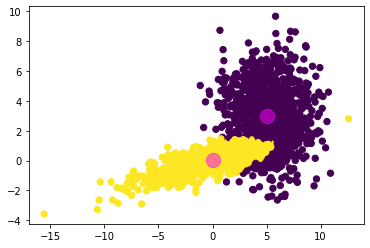

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='viridis')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='magenta', s=200, alpha=0.5)
plt.show()